# Лабораторная работа 1

Выполнила Сергеева Александра группа 6409-010302D

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора


Вариант 3: задания 1 и 3 на наборе данных CIFAR-10


## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10
from datetime import datetime


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

In [30]:
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



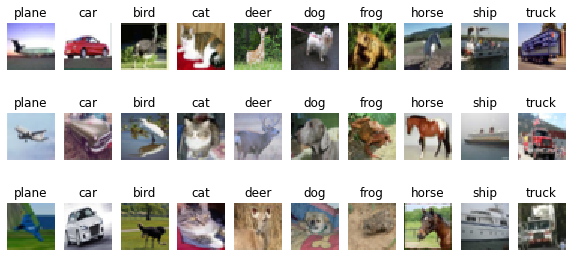

In [31]:
# Список классов, к которым относятся изображения
mapping_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Перебор индексов и названий классов из списка классов
for class_index, class_name in enumerate(mapping_labels):
    #Определение индексов элементов, удовлетворяющих условию y_train == class_index
    index = np.where(y_train == class_index)[0]
    # Выбор случайных индексов для данного класса, число - количество изображений, выведенных на экран
    class_indexes = np.random.choice(index, 3, replace=False)
    # Перебор выбранных индексов для данного класса
    for i, idx in enumerate(class_indexes):
        # Вычисление индекса для отображения в графике
        plt_idx = i * 10 + class_index + 1
        # Создание подграфика в сетке 5x10
        plt.subplot(5, 10, plt_idx)
        # Отображение изображения из обучающего набора данных
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        # Добавление названия класса к изображению данного класса
        plt.title(class_name)
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [32]:
# Определяем объем выборки для обучения
num_training = 5000
x_train_mask = X_train[:5000]
y_train_new = y_train[:5000]

# Определяем объем выборки для теста
num_test = 500
x_test_mask = X_test[:500]
y_test_new = y_test[:500]

# Формируем одномерный массив
x_train_new = np.reshape(x_train_mask, (x_train_mask.shape[0], -1))
x_test_new = np.reshape(x_test_mask, (x_test_mask.shape[0], -1))
print(x_train_new.shape, x_test_new.shape, y_train_new.shape, y_test_new.shape)

(5000, 3072) (500, 3072) (5000,) (500,)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [33]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(x_train_new, y_train_new)

1.5 Выполните классификацию на тестовой выборке

Используется два цикл над тестовыми данными

In [34]:
#Записываем текущее время
start_time_two_loops = datetime.now()
#Рассчитываем расстояние между каждой тестовой точкой и каждой тренировочной точкой 
dists_two_loops = classifier.compute_distances_two_loops(x_test_new)
#Вычисляем разницу между текущим временем и временной меткой
time_two_loops = datetime.now() - start_time_two_loops
print(dists_two_loops.shape)
print( 'Time two loops: ', time_two_loops)

(500, 5000)
Time two loops:  0:00:48.020145


Используется один цикл над тестовыми данными

In [35]:
start_time_one_loop = datetime.now()
dists_one_loop = classifier.compute_distances_one_loop(x_test_new)
time_one_loop = datetime.now() - start_time_one_loop
print(dists_one_loop.shape)
print( 'Time one loop: ', time_one_loop)

(500, 5000)
Time one loop:  0:01:20.790599


Циклы не используются над тестовыми данными

In [36]:
start_time_no_loops = datetime.now()
dists_no_loops = classifier.compute_distances_no_loops(x_test_new)
time_no_loops = datetime.now() - start_time_no_loops
print(dists_no_loops.shape)
print( 'Time no loops: ', time_no_loops)

(500, 5000)
Time no loops:  0:00:01.180153


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


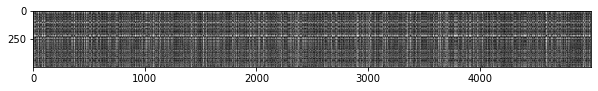

In [37]:
plt.imshow(dists_two_loops, interpolation = 'none')
plt.show()

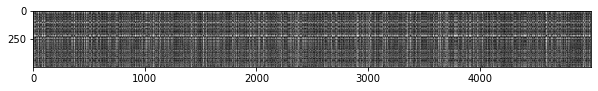

In [38]:
plt.imshow(dists_one_loop, interpolation = 'none')
plt.show()

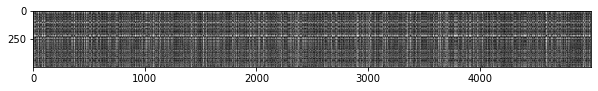

In [39]:
plt.imshow(dists_no_loops, interpolation = 'none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [40]:
#Функция определения точности предсказания
def accuracy(y_test_pred,y_test_new, num_test):
    return np.float64(np.sum(y_test_pred == y_test_new)) / num_test;

In [41]:
y_test_pred_two_loops = classifier.predict_labels(dists_two_loops, k = 2)
print ('Точность при использовании "Two loops":', accuracy(y_test_pred_two_loops, y_test_new, num_test))
y_test_pred_one_loop = classifier.predict_labels(dists_one_loop, k = 2)
print ('Точность при использовании "One loop":', accuracy(y_test_pred_one_loop, y_test_new, num_test))
y_test_pred_no_loops = classifier.predict_labels(dists_no_loops, k = 2)
print ('Точность при использовании "No loops":', accuracy(y_test_pred_no_loops, y_test_new, num_test))

Точность при использовании "Two loops": 0.224
Точность при использовании "One loop": 0.224
Точность при использовании "No loops": 0.224


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [42]:
#Словарь точностей от количества соседей
accur = {1:0, 2:0, 3:0, 4:0, 5:0, 8:0, 10:0, 12:0, 15:0, 20:0, 25:0, 30:0, 35:0, 40:0, 45:0, 50:0}


for i in accur:
    #Создание модели k-ближайших соседей
    model = KNearestNeighbor()
    #Обучение модели на обучающих данных
    model.train(x_train_new, y_train_new)
    # Вычисление расстояний между тестовыми данными и обучающими данными без использования циклов
    dists = model.compute_distances_no_loops(x_test_new)
    #Предсказание меток классов для тестовых данных с использованием параметра k равного текущему значению i
    y_test_pred_knn = model.predict_labels(dists, k = i)
    #Вычисление точности модели на основе предсказанных меток классов и истинных меток классов
    accur[i] = accuracy(y_test_pred_knn, y_test_new, num_test)
for key, value in accur.items():
    print(f"K = : {key}, Точность: {value}")

K = : 1, Точность: 0.274
K = : 2, Точность: 0.224
K = : 3, Точность: 0.272
K = : 4, Точность: 0.272
K = : 5, Точность: 0.278
K = : 8, Точность: 0.274
K = : 10, Точность: 0.282
K = : 12, Точность: 0.256
K = : 15, Точность: 0.272
K = : 20, Точность: 0.272
K = : 25, Точность: 0.274
K = : 30, Точность: 0.254
K = : 35, Точность: 0.25
K = : 40, Точность: 0.246
K = : 45, Точность: 0.254
K = : 50, Точность: 0.252


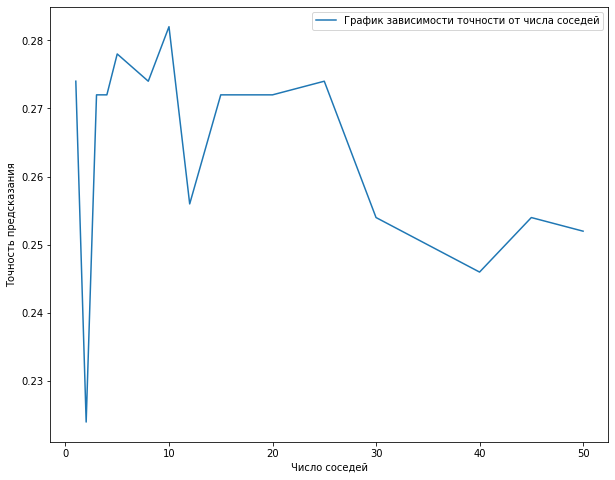

In [43]:
# График зависимости
plt.plot(accur.keys(), accur.values(), label = 'График зависимости точности от числа соседей')

plt.legend()
plt.xlabel('Число соседей')
plt.ylabel('Точность предсказания')
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [44]:
best_neighbors = max(accur, key = accur.get)
print("Лучшее значение параметра K = %d Точность = %f" %(best_neighbors, accur[best_neighbors]))


Лучшее значение параметра K = 10 Точность = 0.282000



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [45]:
#Создание модели k-ближайших соседей
classifier = KNearestNeighbor()
#Обучение модели на обучающих данных
classifier.train(x_train_new, y_train_new)
# Вычисление расстояний между тестовыми данными и обучающими данными без использования циклов
dists_no_loops = classifier.compute_distances_no_loops(x_test_new)
#Предсказание меток классов для тестовых данных с использованием параметра k равного текущему значению 10
y_test_pred_no_loops = classifier.predict_labels(dists_no_loops, k = best_neighbors)
print("Точность", accuracy(y_test_pred_no_loops, y_test_new, num_test))

Точность 0.282


In [46]:
classifier = KNearestNeighbor()
classifier.train(x_train_new, y_train_new)
dists_one_loops = classifier.compute_distances_one_loop(x_test_new)
y_test_pred_one_loops = classifier.predict_labels(dists_one_loops, k = best_neighbors)
print("Точность", accuracy(y_test_pred_one_loops, y_test_new, num_test))

Точность 0.282


1.11 Сделайте выводы по результатам 1 части задания.

Сравнивая три разных вида вычисления расстояния, а именно: two_loops, one_loop, no_loops, получились следующие результаты:

1. Все три вида дают одинаковую точность предсказания
2. Матрицы расстояний не дают никакой информации, так как выглядят одинаково
3. Наименьшее время дает no_loops, худшее время one_loop
4. Наилучшее количество K=10, после переобучения точность остается такой же
5. После переобучения с K=10 one_loop, no_loops дают одинаковую точность = 0.282



## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [3]:
# Устанавливаем количество обучающих, валидационных, тестовых и разработочных данных
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

#Считывание данных
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Выбираем данные для валидации из обучающего набора
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Обновляем обучающий набор данных, исключая данные для валидации
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# Выбираем случайные данные для разработки из обновленного обучающего набора
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Выбираем данные для тестирования из тестового набора
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

#Количество строк остается прежним, а количество столбцов преобразуется в одномерный массив
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

#Вывод размеров
print ("X_train ",X_train.shape)
print ("y_train ",y_train.shape)
print ("X_val ",X_val.shape)
print ("y_val ",y_val.shape)
print ("X_test ",X_test.shape)
print ("y_test ",y_test.shape)
print ("X_dev ",X_dev.shape)
print ("y_dev ",y_dev.shape)

X_train  (49000, 3072)
y_train  (49000,)
X_val  (1000, 3072)
y_val  (1000,)
X_test  (1000, 3072)
y_test  (1000,)
X_dev  (500, 3072)
y_dev  (500,)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


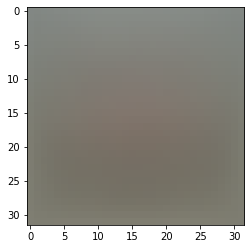

X_train  (49000, 3073)
y_train  (49000,)
X_val  (1000, 3073)
y_val  (1000,)
X_test  (1000, 3073)
y_test  (1000,)
X_dev  (500, 3072)
y_dev  (500,)


In [4]:
# Вычисляем среднее изображение по всем изображениям обучающего набора X_train
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])  # Выводим первые 10 элементов среднего изображения

# Отображаем среднее изображение в виде изображения размером 32x32 пикселя с 3 каналами (RGB)
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

# Центрируем данные: вычитаем среднее изображение из всех наборов данных
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

# Добавляем столбец единиц к данным для учета сдвига в модели
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print ("X_train ",X_train.shape)
print ("y_train ",y_train.shape)
print ("X_val ",X_val.shape)
print ("y_val ",y_val.shape)
print ("X_test ",X_test.shape)
print ("y_test ",y_test.shape)
print ("X_dev ",X_dev.shape)
print ("y_dev ",y_dev.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [5]:
from scripts.classifiers.linear_svm import svm_loss_naive
import time

#Инициализация матрицы весов W случайными значениями
W = np.random.randn(X_dev.shape[1], 10) * 0.0001

#Вычисление значения потерь и градиента для случая с регуляризацией
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 10.797707



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [6]:
#Вычисление значения потерь и градиента для случая без регуляризации
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
#Создание анонимной функции f, которая вычисляет значение потерь для заданных весов, данных и меток без регуляризации
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
#Выполнение численной проверки градиента для случая без регуляризации
grad_numerical = grad_check_sparse(f, W, grad)

#Вычисление значения потерь и градиента для случая с большим коэффициентом регуляризации и вывод значения потерь
loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
#Создание анонимной функции f, которая вычисляет значение потерь для заданных весов, данных и меток с большим коэффициентом регуляризации
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
#Выполнение численной проверки градиента  для случая с большим коэффициентом регуляризации
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 76.303422 analytic: 76.294000, relative error: 6.174115e-05
numerical: 42.332000 analytic: 42.332000, relative error: 8.791565e-12
numerical: 59.773055 analytic: 59.806000, relative error: 2.755107e-04
numerical: -40.641538 analytic: -40.476000, relative error: 2.040712e-03
numerical: 27.532038 analytic: 27.414000, relative error: 2.148260e-03
numerical: 10.260000 analytic: 10.260000, relative error: 3.485719e-11
numerical: 60.468000 analytic: 60.468000, relative error: 1.908024e-12
numerical: -50.937538 analytic: -50.848000, relative error: 8.796688e-04
numerical: 21.916000 analytic: 21.916000, relative error: 2.777037e-12
numerical: -90.188000 analytic: -90.188000, relative error: 1.365968e-12
numerical: 6.854618 analytic: 6.811586, relative error: 3.148816e-03
numerical: 3.504108 analytic: 3.504108, relative error: 3.429343e-11
numerical: -42.018409 analytic: -41.919871, relative error: 1.173929e-03
numerical: -44.536187 analytic: -44.676177, relative error: 1.569183e-03


2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [7]:
from scripts.classifiers.linear_svm import svm_loss_vectorized

In [8]:
#Подсчет времени вычисления градиента для случая с регуляризацией
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

#Подсчет времени вычисления градиента для векторизованного подхода
tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

#Вычисление разницы между градиентами, полученными с помощью "наивного" и векторизованного подходов
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.150012s
Vectorized loss and gradient: computed in 0.017004s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [9]:
from scripts.classifiers import LinearSVM
#Создание модели
svm = LinearSVM()
tic = time.time()
#Обучение модели SVM
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 776.225520
iteration 100 / 1500: loss 284.836442
iteration 200 / 1500: loss 106.335204
iteration 300 / 1500: loss 42.452001
iteration 400 / 1500: loss 18.231219
iteration 500 / 1500: loss 10.167619
iteration 600 / 1500: loss 6.972561
iteration 700 / 1500: loss 5.959080
iteration 800 / 1500: loss 5.211060
iteration 900 / 1500: loss 5.536058
iteration 1000 / 1500: loss 5.120800
iteration 1100 / 1500: loss 5.349825
iteration 1200 / 1500: loss 5.317116
iteration 1300 / 1500: loss 5.337827
iteration 1400 / 1500: loss 5.483695
That took 16.481347s


In [10]:
#Предсказание меток для обучающих данных с помощью обученной модели
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred)))
#Предсказание меток для валидационных данных с помощью обученной модели
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred)))

training accuracy: 0.360898
validation accuracy: 0.374000


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [11]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
results = {}
best_val = -1   
best_svm = None

In [12]:
for lr in learning_rates:
    for reg in regularization_strengths:
        # Создание экземпляра класса LinearSVM
        svm = LinearSVM()
        
        # Обучение модели LinearSVM на обучающих данных
        svm.train(X_train, y_train, lr, reg, num_iters=2000, verbose=False)
        
        # Предсказание меток классов для обучающих и валидационных данных
        y_train_pred = svm.predict(X_train)
        y_val_pred = svm.predict(X_val)
        
        # Вычисление точности на обучающих и валидационных данных
        training_accuracies = np.mean(y_train == y_train_pred)
        validation_accuracies = np.mean(y_val == y_val_pred)
        
        # Сохранение точности на обучающих и валидационных данных в словаре results
        results[(lr, reg)] = (training_accuracies, validation_accuracies)
        
        # Проверка, является ли текущая точность на валидационных данных лучшей
        if validation_accuracies > best_val:
            best_val = validation_accuracies


c:\Users\ПК\Documents\university\8 семестр\Нейронные сети\DL_Course_SamU-master\lab_1-2\scripts\classifiers\linear_svm.py:101: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W)
c:\Users\ПК\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\ПК\Documents\university\8 семестр\Нейронные сети\DL_Course_SamU-master\lab_1-2\scripts\classifiers\linear_svm.py:101: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)
c:\Users\ПК\Documents\university\8 семестр\Нейронные сети\DL_Course_SamU-master\lab_1-2\scripts\classifiers\linear_svm.py:93: RuntimeWarning: overflow encountered in subtract
  margin = scores_ - correct_class_scores[..., np.newaxis] + 1
c:\Users\ПК\Documents\university\8 семестр\Нейронные сети\DL_Course_SamU-master\lab_1-2\scripts\classifiers\linear_svm.py:118: RuntimeWarni

In [13]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('Коэффициент скорости обучения: %e Параметр регуляризации: %e Точность на обучающих данных: %f Точность на валидационных данных: %f' % (lr, reg, train_accuracy, val_accuracy))

Коэффициент скорости обучения: 1.000000e-07 Параметр регуляризации: 2.500000e+04 Точность на обучающих данных: 0.365429 Точность на валидационных данных: 0.381000
Коэффициент скорости обучения: 1.000000e-07 Параметр регуляризации: 5.000000e+04 Точность на обучающих данных: 0.355735 Точность на валидационных данных: 0.366000
Коэффициент скорости обучения: 5.000000e-05 Параметр регуляризации: 2.500000e+04 Точность на обучающих данных: 0.100265 Точность на валидационных данных: 0.087000
Коэффициент скорости обучения: 5.000000e-05 Параметр регуляризации: 5.000000e+04 Точность на обучающих данных: 0.100265 Точность на валидационных данных: 0.087000


In [14]:
print('Лучшая точность при перекрестной валидации: %f' % best_val)

Лучшая точность при перекрестной валидации: 0.381000


2.9 Сделайте выводы по второй части задания

1. Реализованы функции svm_loss_naive и svm_loss_vectorized для вычисления функции потерь и градиента softmax классификатора с использованием циклов и векторизации соответственно.
2. Проведена проверка градиента численным методом для обеих реализаций с различными значениями регуляризации, что позволяет убедиться в корректности вычислений.
3. Замерено время выполнения функций svm_loss_naive и svm_loss_vectorized. Быстрее показал себя svm_loss_vectorized.
4. Вычислена разница в значениях функций потерь и градиентов между naive и vectorized реализациями, которая оказалась незначительной, что подтверждает правильность векторизации.
5. При обучении модели лучшая точность равно 36% на обучающей выборки при коэффициенте скорости обучения: 1.000000e-07 параметре регуляризации: 2.500000e+04
6. Лучшая точность при перекрестной валидации равно 0.381.

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [60]:
# Устанавливаем количество обучающих, валидационных, тестовых и разработочных данных
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

#Считывание данных
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Выбираем данные для валидации из обучающего набора
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Обновляем обучающий набор данных, исключая данные для валидации
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# Выбираем случайные данные для разработки из обновленного обучающего набора
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Выбираем данные для тестирования из тестового набора
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

#Количество строк остается прежним, а количество столбцов преобразуется в одномерный массив
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

#Вывод размеров
print ("X_train ",X_train.shape)
print ("y_train ",y_train.shape)
print ("X_val ",X_val.shape)
print ("y_val ",y_val.shape)
print ("X_test ",X_test.shape)
print ("y_test ",y_test.shape)
print ("X_dev ",X_dev.shape)
print ("y_dev ",y_dev.shape)

X_train  (49000, 3072)
y_train  (49000,)
X_val  (1000, 3072)
y_val  (1000,)
X_test  (1000, 3072)
y_test  (1000,)
X_dev  (500, 3072)
y_dev  (500,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


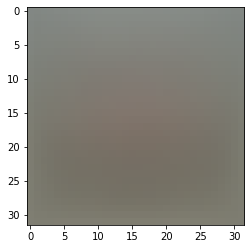

X_train  (49000, 3073)
y_train  (49000,)
X_val  (1000, 3073)
y_val  (1000,)
X_test  (1000, 3073)
y_test  (1000,)
X_dev  (500, 3073)
y_dev  (500,)


In [61]:
# Вычисляем среднее изображение по всем изображениям обучающего набора X_train
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])

# Отображаем среднее изображение в виде изображения размером 32x32 пикселя с 3 каналами (RGB)
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

# Центрируем данные: вычитаем среднее изображение из всех наборов данных
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

# Добавляем столбец единиц к данным для учета сдвига в модели
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])


print ("X_train ",X_train.shape)
print ("y_train ",y_train.shape)
print ("X_val ",X_val.shape)
print ("y_val ",y_val.shape)
print ("X_test ",X_test.shape)
print ("y_test ",y_test.shape)
print ("X_dev ",X_dev.shape)
print ("y_dev ",y_dev.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [62]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

#Генерация случайной матрицы весов W и инициализация ее значениями из нормального распределения.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# Проверка адекватности результатов: значение функции потерь должно быть примерно равно -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))


loss: 2.377203
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [63]:
from scripts.gradient_check import grad_check_sparse

# Вычисление функции потерь и градиента без регуляризации
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# Проверка градиента численным методом
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# Вычисление функции потерь и градиента с регуляризацией
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)

# Проверка градиента численным методом
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 1.718906 analytic: 1.718906, relative error: 3.987969e-08
numerical: 2.581058 analytic: 2.581058, relative error: 2.267453e-09
numerical: -0.762614 analytic: -0.762614, relative error: 2.080891e-08
numerical: 1.844416 analytic: 1.844416, relative error: 2.762836e-08
numerical: 0.270727 analytic: 0.270727, relative error: 1.390715e-07
numerical: 0.636392 analytic: 0.636392, relative error: 1.065858e-07
numerical: 2.444844 analytic: 2.444844, relative error: 2.068141e-08
numerical: 2.627367 analytic: 2.627367, relative error: 2.057819e-08
numerical: 0.048680 analytic: 0.048681, relative error: 4.998816e-07
numerical: -4.127872 analytic: -4.127872, relative error: 1.186254e-08
numerical: -1.616705 analytic: -1.616705, relative error: 1.217609e-08
numerical: 1.853096 analytic: 1.853096, relative error: 1.757446e-08
numerical: -1.821774 analytic: -1.821774, relative error: 2.862260e-08
numerical: -0.300846 analytic: -0.300846, relative error: 4.419926e-08
numerical: 0.546379 anal

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [64]:
#Замер времени выполнения softmax_loss_naive
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
#Замер времени выполнения softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# Вычисление разницы в значениях функций потерь и градиентов между naive и vectorized реализациями.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.377203e+00 computed in 0.253017s
vectorized loss: 2.377203e+00 computed in 0.246017s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [65]:
from scripts.classifiers.linear_classifier import Softmax
#Создание модели
softmax_classifier = Softmax()
#Обучение модели Softmax
softmax_classifier.train(X_train, y_train)
print(f"Accuracy: {accuracy(softmax_classifier.predict(X_test), y_test,  num_test)}")

c:\Users\ПК\Documents\university\8 семестр\Нейронные сети\DL_Course_SamU-master\lab_1-2\scripts\classifiers\softmax.py:87: RuntimeWarning: overflow encountered in exp
  sum_j = np.sum(np.exp(scores), axis=1).reshape((num_train, 1))
c:\Users\ПК\Documents\university\8 семестр\Нейронные сети\DL_Course_SamU-master\lab_1-2\scripts\classifiers\softmax.py:94: RuntimeWarning: overflow encountered in exp
  dW = X.T.dot(np.exp(scores) / sum_j) - X.T.dot(correct_matrix)
c:\Users\ПК\Documents\university\8 семестр\Нейронные сети\DL_Course_SamU-master\lab_1-2\scripts\classifiers\softmax.py:94: RuntimeWarning: invalid value encountered in true_divide
  dW = X.T.dot(np.exp(scores) / sum_j) - X.T.dot(correct_matrix)


Accuracy: 0.103


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [66]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
results = {}
best_val = -1

In [67]:
for lr in learning_rates:
    for reg in regularization_strengths:
        # Создание экземпляра класса LinearSVM
        softmax = Softmax()
        
        # Обучение модели LinearSVM на обучающих данных
        softmax.train(X_train, y_train, lr, reg, num_iters=2000, verbose=False)
        
        # Предсказание меток классов для обучающих и валидационных данных
        y_train_pred = softmax.predict(X_train)
        y_val_pred = softmax.predict(X_val)
        
        # Вычисление точности на обучающих и валидационных данных
        training_accuracies = np.mean(y_train == y_train_pred)
        validation_accuracies = np.mean(y_val == y_val_pred)
        
        # Сохранение точности на обучающих и валидационных данных в словаре results
        results[(lr, reg)] = (training_accuracies, validation_accuracies)
        
        # Проверка, является ли текущая точность на валидационных данных лучшей
        if validation_accuracies > best_val:
            best_val = validation_accuracies

In [68]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('Коэффициент скорости обучения: %e Параметр регуляризации: %e Точность на обучающих данных: %f Точность на валидационных данных: %f' % (lr, reg, train_accuracy, val_accuracy))

Коэффициент скорости обучения: 1.000000e-07 Параметр регуляризации: 2.500000e+04 Точность на обучающих данных: 0.350898 Точность на валидационных данных: 0.366000
Коэффициент скорости обучения: 1.000000e-07 Параметр регуляризации: 5.000000e+04 Точность на обучающих данных: 0.330184 Точность на валидационных данных: 0.347000
Коэффициент скорости обучения: 5.000000e-05 Параметр регуляризации: 2.500000e+04 Точность на обучающих данных: 0.084061 Точность на валидационных данных: 0.090000
Коэффициент скорости обучения: 5.000000e-05 Параметр регуляризации: 5.000000e+04 Точность на обучающих данных: 0.100265 Точность на валидационных данных: 0.087000


In [69]:
print('Лучшая точность при перекрестной валидации: %f' % best_val)

Лучшая точность при перекрестной валидации: 0.366000


3.10 Сделайте выводы по третьей части задания

1. Реализованы функции softmax_loss_naive и softmax_loss_vectorized для вычисления функции потерь и градиента softmax классификатора с использованием циклов и векторизации соответственно.
2. Проведена проверка градиента численным методом для обеих реализаций с различными значениями регуляризации, что позволяет убедиться в корректности вычислений.
3. Замерено время выполнения функций softmax_loss_naive и softmax_loss_vectorized. Быстрее показал себя softmax_loss_vectorized.
4. Вычислена разница в значениях функций потерь и градиентов между naive и vectorized реализациями, которая оказалась незначительной, что подтверждает правильность векторизации.
5. При обучении модели лучшая точность равно 35% на обучающей выборки при коэффициенте скорости обучения: 1.000000e-07 параметре регуляризации: 2.500000e+04
6. Лучшая точность при перекрестной валидации равно 0.366.